<class 'matplotlib.axes._subplots.AxesSubplot'>


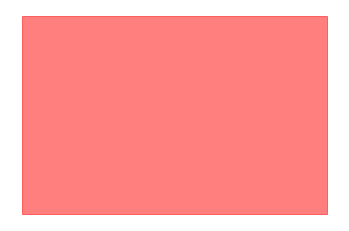

In [64]:
from colour import Color, RGB_TO_COLOR_NAMES
import matplotlib.pyplot as plt

x = [0, 0, 0.1, 0.1]
y = [0, 0.1, 0.1, 0]
fig, ax = plt.subplots()
ax.fill(x, y, color=(1, 0, 0, 0.5))
print(type(ax))
ax.axis('off')
plt.show()
plt.close()

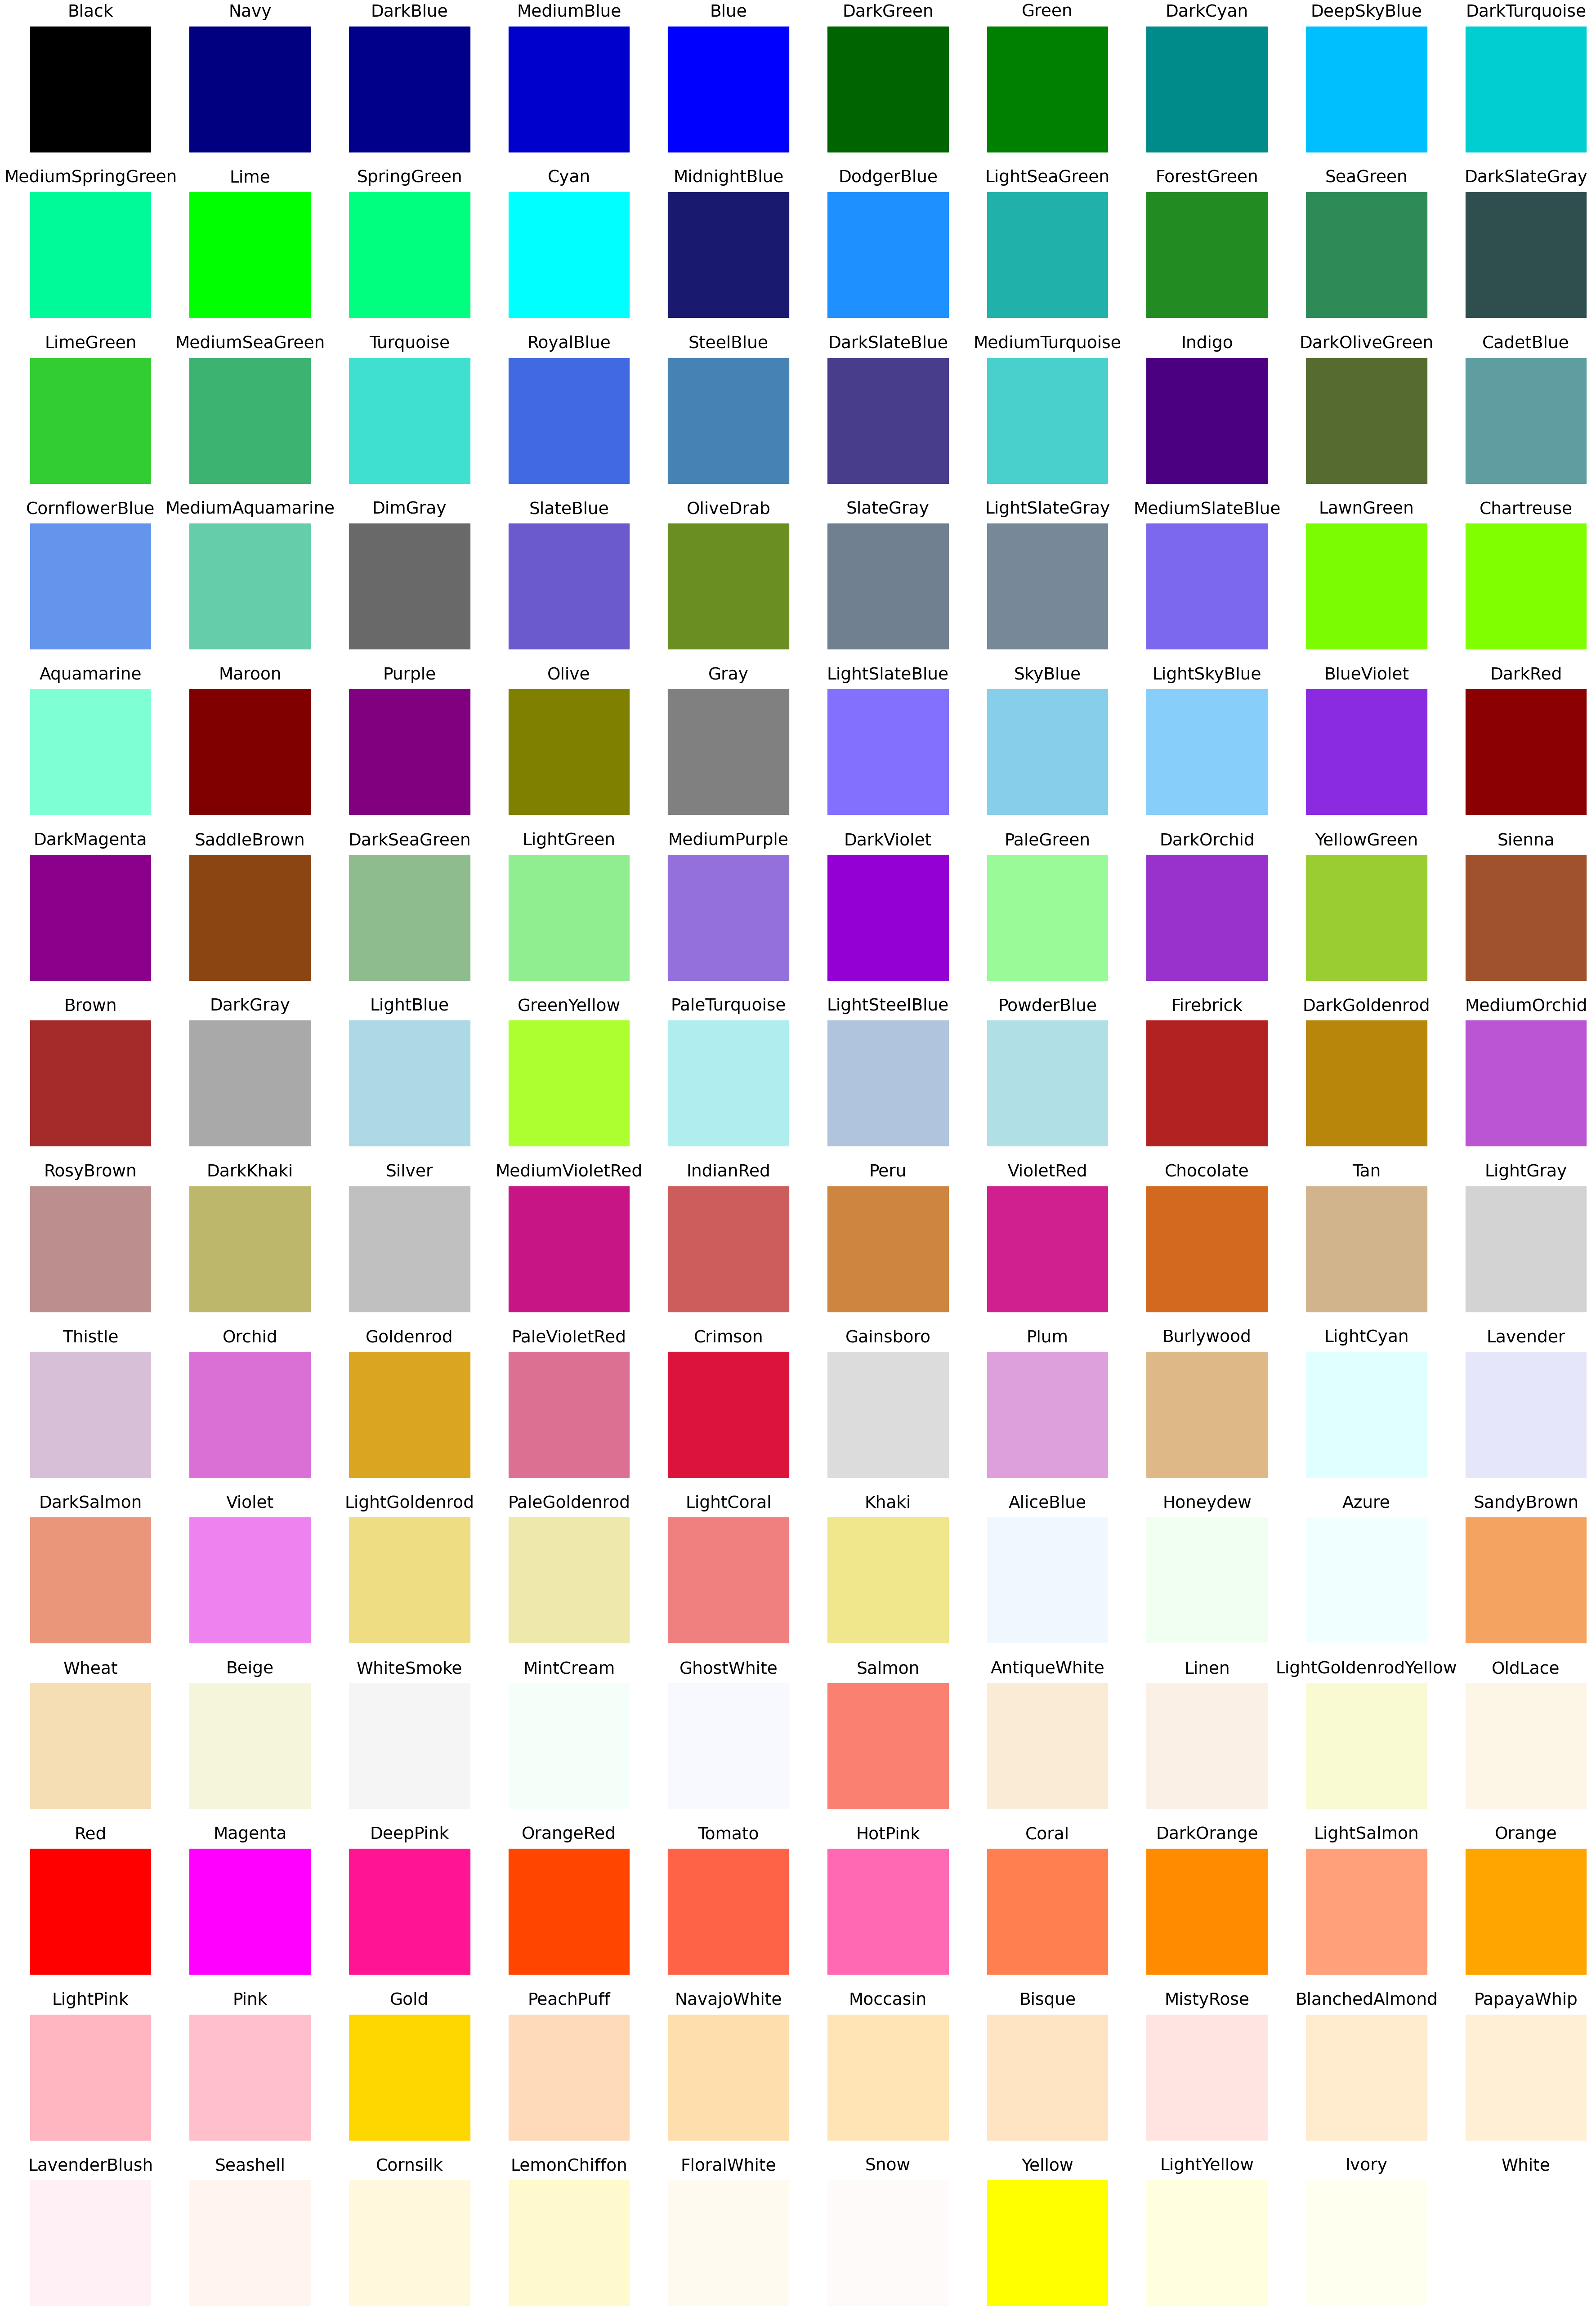

In [110]:
fig, axis = plt.subplots(14, 10, figsize=(50, 75), dpi=90)


axis = axis.ravel()

i = 0
for rgb, name in RGB_TO_COLOR_NAMES.items():
    axis[i].fill(x, y, color=[c / 255 for c in rgb])
    axis[i].set_axis_off()
    axis[i].set_title(name[0], fontdict={'fontsize': 30, 'fontweight': 100})
    i += 1
plt.show()

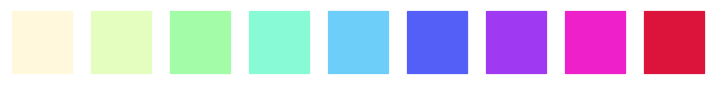

In [75]:
fig, axis = plt.subplots(1, 9, figsize=(10, 1), dpi=90)
axis = axis.ravel()

c1 = Color("Crimson")
c2 = Color("Cornsilk")
c1, c2 = c2, c1

i = 0
for color in c1.range_to(c2, 9):
    axis[i].fill(x, y, color=color.rgb)
    axis[i].set_axis_off()
    i += 1
plt.show()
plt.close()

0.1333333333333333 0.5450980392156862 0.13333333333333344
0.2245098039215686 0.4867647058823529 0.1460784313725491
0.3156862745098039 0.4284313725490196 0.15882352941176478
0.4068627450980392 0.3700980392156862 0.17156862745098045
0.4980392156862745 0.3117647058823529 0.1843137254901961
0.5892156862745099 0.2534313725490196 0.1970588235294118
0.6803921568627451 0.19509803921568622 0.20980392156862743
0.7715686274509803 0.1367647058823529 0.2225490196078431
0.8627450980392157 0.07843137254901955 0.23529411764705876


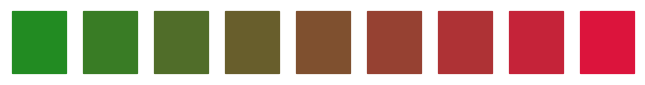

In [104]:
scale = 9

c1 = Color("ForestGreen")
c2 = Color("Crimson")

fig, axis = plt.subplots(1, scale, figsize=(scale, 1), dpi=90)
axis = axis.ravel()

progression = zip(
    [i / (scale - 1) for i in range(scale)],
    [i / (scale - 1) for i in range(scale - 1, -1, -1)]
)

i = 0
for p, q in progression:
    red = c1.red * q + c2.red * p
    green = c1.green * q + c2.green * p
    blue = c1.blue * q + c2.blue * p
    c = Color(red=red, green=green, blue=blue)
    axis[i].fill(x, y, color=c.rgb)
    axis[i].set_axis_off()
    i += 1

plt.show()
plt.close()

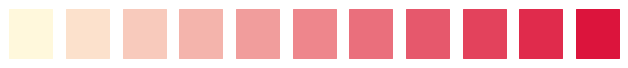

In [119]:
def plt_colors(colors):
    fig, axis = plt.subplots(1, len(colors), figsize=(len(colors), 1))
    for i, c in enumerate(colors):
        axis[i].fill(x, y, color=c.rgb)
        axis[i].set_axis_off()

def get_2_colors_gradient(c1, c2, scale):
    progression = zip(
        [i / (scale - 1) for i in range(scale)],
        [i / (scale - 1) for i in range(scale - 1, -1, -1)]
    )
    return [
        Color(
            red=c1.red * q + c2.red * p,
            green=c1.green * q + c2.green * p,
            blue=c1.blue * q + c2.blue * p, 
        ) for p, q in progression
    ]

colors = get_2_colors_gradient(Color("Cornsilk"), Color("Crimson"), 11)
plt_colors(colors)

In [161]:
def get_intervals(scale, nb_colors):
    intervals = []
    nb_cubes = scale - nb_colors
    cpt = 0
    while nb_cubes > 0:
        cpt += 1
        pad = nb_cubes // (nb_colors - cpt)
        nb_cubes -= pad
        intervals.append(pad)
    return intervals

print(f"scale=5;colors=3;intervals={get_intervals(5, 3)}")
print(f"scale=7;colors=3;intervals={get_intervals(7, 3)}")
print(f"scale=13;colors=4;intervals={get_intervals(13, 4)}")
print(f"scale=15;colors=4;intervals={get_intervals(15, 4)}")

scale=5;colors=3;intervals=[1, 1]
scale=7;colors=3;intervals=[2, 2]
scale=13;colors=4;intervals=[3, 3, 3]
scale=15;colors=4;intervals=[3, 4, 4]


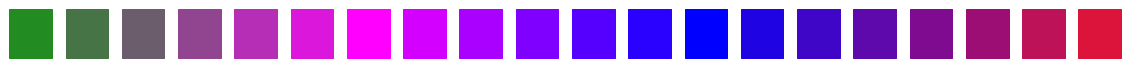

In [173]:
def get_colors_gradient(colors=None, scale=9):
    if colors is None:
        raise ValueError("colors args can't be null")
    if len(colors) >= scale:
        raise ValueError("You need to provide scale+1 different colors")
    intervals = get_intervals(scale, len(colors))
    results = list()
    for i, pad in enumerate(intervals):
        results += get_2_colors_gradient(colors[i], colors[i+1], pad+2)[:-1]
    results.append(colors[-1])
    return results

colors = [
    Color("ForestGreen"),
    Color("Magenta"),
    Color("Blue"),
    Color("Crimson"),
]
plt_colors(get_colors_gradient(colors=colors, scale=20))